Advanced Differential Equation Solver
--------------------------------------
Enter differential equation (using SymPy syntax): y.diff(t) - 2 * y + t

Enter initial conditions:
Initial y value (y(0)): 1
Initial dy/dt value: 0

Start time (default 0): 0
End time: 10


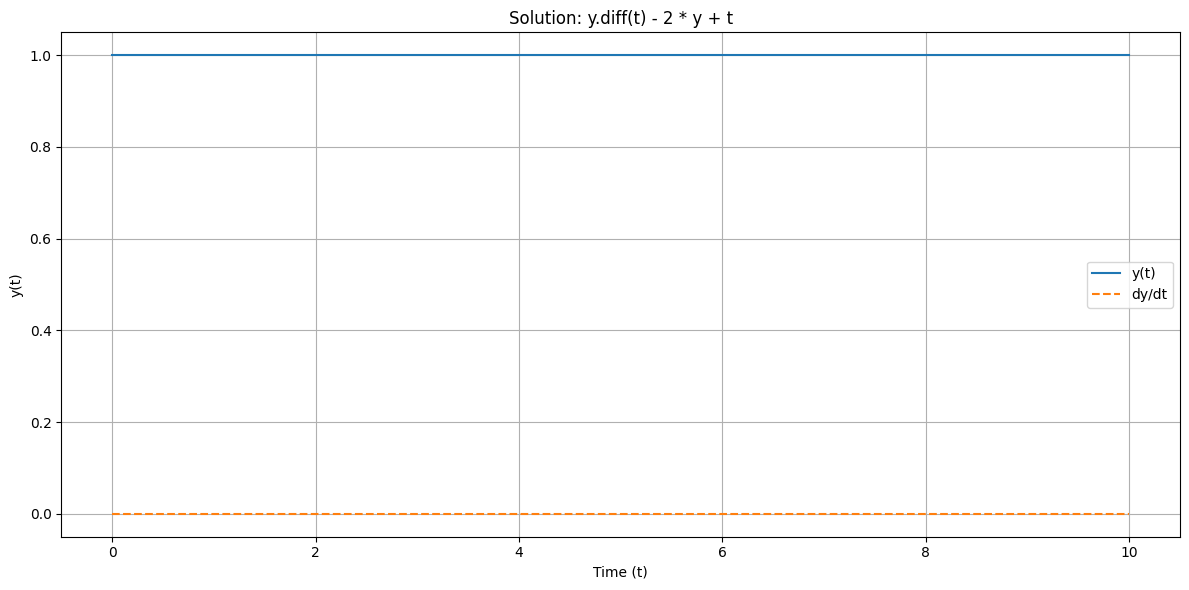

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

class DifferentialEquationSolver:
    def __init__(self):
        self.sympify_cache = {}

    def parse_equation(self, equation_str):
        """
        Parse and validate the differential equation string.
        Supports various formats and equation orders.
        """
        try:
            # Use SymPy for symbolic manipulation
            t, y = sp.symbols('t y')

            # Normalize equation to ensure it's in the right format
            equation = sp.sympify(equation_str, locals={'t': t, 'y': y})

            return equation
        except Exception as e:
            print(f"Error parsing equation: {e}")
            print("Tips:")
            print("- Use SymPy/Python syntax")
            print("- Variables should be 't' and 'y'")
            print("- Example: 'y*sp.sin(t)' or '2*y - t'")
            raise ValueError("Invalid equation format")

    def convert_to_system(self, equation):
        """
        Convert equation to a system of first-order ODEs.
        Supports higher-order and more complex differential equations.
        """
        t, y = sp.symbols('t y')

        # Attempt to determine equation order and transform
        if len(equation.free_symbols) > 2:
            raise ValueError("Equations with multiple variables are not supported.")

        # Generate state variables and derivative function
        try:
            # Convert to first-order system
            dy_dt = sp.diff(equation, t)
            d2y_dt2 = sp.diff(dy_dt, t)

            # Create lambda functions for numerical solving
            f1 = sp.lambdify((t, y), dy_dt, 'numpy')
            f2 = sp.lambdify((t, y), d2y_dt2, 'numpy')

            def ode_system(T, Y):
                """
                Convert to first-order system for solve_ivp
                Y[0] is y, Y[1] is dy/dt
                """
                return [Y[1], f2(T, Y[0])]

            return ode_system

        except Exception as e:
            print(f"Error converting equation: {e}")
            raise ValueError("Could not convert equation to numerical form")

    def solve(self, equation_str, initial_conditions, t_span):
        """
        Solve the differential equation numerically.

        :param equation_str: Symbolic equation string
        :param initial_conditions: List of initial values [y0, dy0/dt]
        :param t_span: Time span for solution
        """
        # Parse the equation symbolically
        symbolic_eq = self.parse_equation(equation_str)

        # Convert to system of first-order ODEs
        ode_system = self.convert_to_system(symbolic_eq)

        # Solve using solve_ivp for more robust numerical integration
        solution = solve_ivp(
            ode_system,
            t_span,
            initial_conditions,
            dense_output=True,
            max_step=0.1
        )

        return solution

    def plot_solution(self, solution, title=None):
        """
        Plot the solution of the differential equation.
        """
        plt.figure(figsize=(12, 6))

        # Plot solution components
        plt.plot(solution.t, solution.y[0], label='y(t)')
        if solution.y.shape[0] > 1:
            plt.plot(solution.t, solution.y[1], label='dy/dt', linestyle='--')

        plt.title(title or "Differential Equation Solution")
        plt.xlabel("Time (t)")
        plt.ylabel("y(t)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def interactive_solve(self):
        """
        Interactive interface for solving differential equations.
        """
        print("Advanced Differential Equation Solver")
        print("--------------------------------------")

        try:
            # Get equation input
            equation_str = input("Enter differential equation (using SymPy syntax): ")

            # Get initial conditions
            print("\nEnter initial conditions:")
            y0 = float(input("Initial y value (y(0)): "))
            dydt0 = float(input("Initial dy/dt value: "))

            # Get time span
            t_start = float(input("\nStart time (default 0): ") or 0)
            t_end = float(input("End time: "))

            # Solve and plot
            solution = self.solve(
                equation_str,
                [y0, dydt0],
                [t_start, t_end]
            )

            self.plot_solution(solution, title=f"Solution: {equation_str}")

        except Exception as e:
            print(f"Error: {e}")
            print("Please check your inputs and try again.")

# Example usage
if __name__ == "__main__":
    solver = DifferentialEquationSolver()
    solver.interactive_solve()

# Example test cases to demonstrate capabilities
# Examples:
# 1. Simple harmonic oscillator: y'' + y = 0
# 2. Damped harmonic oscillator: y'' + 2*y' + y = 0
# 3. More complex:



